## 4 Testing Model<a id='4_Testing_Model'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Modeling](#4_Modeling)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load The Model](#4.4_Load_The_Model)
  * [4.5 Predicting Parameters](#4.5_Predicting_Parameters)

## 4.2 Introduction<a id='4.2_Introduction'></a>

We will finally be testing out our model in recreating an audio sample with a synthesizer!

## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import os
import pandas as pd
import numpy as np
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init
import torch.optim as optim
from torch_lr_finder import LRFinder
import dawdreamer as daw

import warnings
warnings.filterwarnings("ignore")

C:\Users\notis\anaconda3\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [14]:
combined_data = pd.read_csv('../data/interim/prediction.csv',index_col=0).reset_index()

In [15]:
combined_data.head()

,Parameters,Values
0,MasterVol,0.662135
1,A Vol,0.581757
2,A Pan,0.493456
3,A Octave,0.401332
4,A Semi,0.504878


## 4.4 Loading Into Serum<a id='4.4_Loading_Into_Serum'></a>

In [7]:
SAMPLE_RATE = 44100
BUFFER_SIZE = 128 # Parameters will undergo automation at this buffer/block size.
SYNTH_PLUGIN = "C:/Program Files/VSTPlugIns/Serum_x64.dll" # extensions: .dll, .vst3, .vst, .component

engine = daw.RenderEngine(SAMPLE_RATE, BUFFER_SIZE)

# Make a processor and give it the unique name "my_synth", for later use.
synth = engine.make_plugin_processor("my_synth", SYNTH_PLUGIN)
assert synth.get_name() == "my_synth"

synth.load_preset('C:/Users/notis/Documents/Xfer/Serum Presets/Presets/Bass/BA Ampology [CFA].fxp')

# synth.open_editor()

True

In [8]:
parameters_df = pd.DataFrame(synth.get_parameters_description())

parameters = parameters_df['name']

In [16]:
set1 = set(list(combined_data['Parameters']))
set2 = set(parameters)

difference = set1 - set2

difference_list = list(difference)

print(difference_list)

['Delta', 'DRY', 'Spin Depth', 'Wet', 'WT', 'Decay', 'OCTAVES', 'PITCH DOWN', 'Spin Rate']


In [22]:
columns_to_check = ['Delta', 'DRY', 'Spin Depth', 'Wet', 'WT', 'Decay', 'OCTAVES', 'PITCH DOWN', 'Spin Rate']

In [23]:
pre_processed_data = pd.read_csv('../data/interim/combined_data.csv',index_col=0)

In [25]:
pre_processed_data[columns_to_check].describe()

,Delta,DRY,Spin Depth,Wet,WT,Decay,OCTAVES,PITCH DOWN,Spin Rate
count,1002.0,1002.000000,1002.000000,1002.0,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,0.0,0.097904,0.604361,1.0,0.143064,0.216617,0.111806,0.172705,0.279591
std,0.0,0.261259,0.400123,0.0,0.309225,0.161284,0.277336,0.331195,0.129233
min,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.200000,1.0,0.000000,0.120000,0.000000,0.000000,0.250000
50%,0.0,0.000000,0.765000,1.0,0.000000,0.140000,0.000000,0.000000,0.250000
75%,0.0,0.000000,1.000000,1.0,0.000000,0.350000,0.000000,0.150000,0.280000
max,0.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


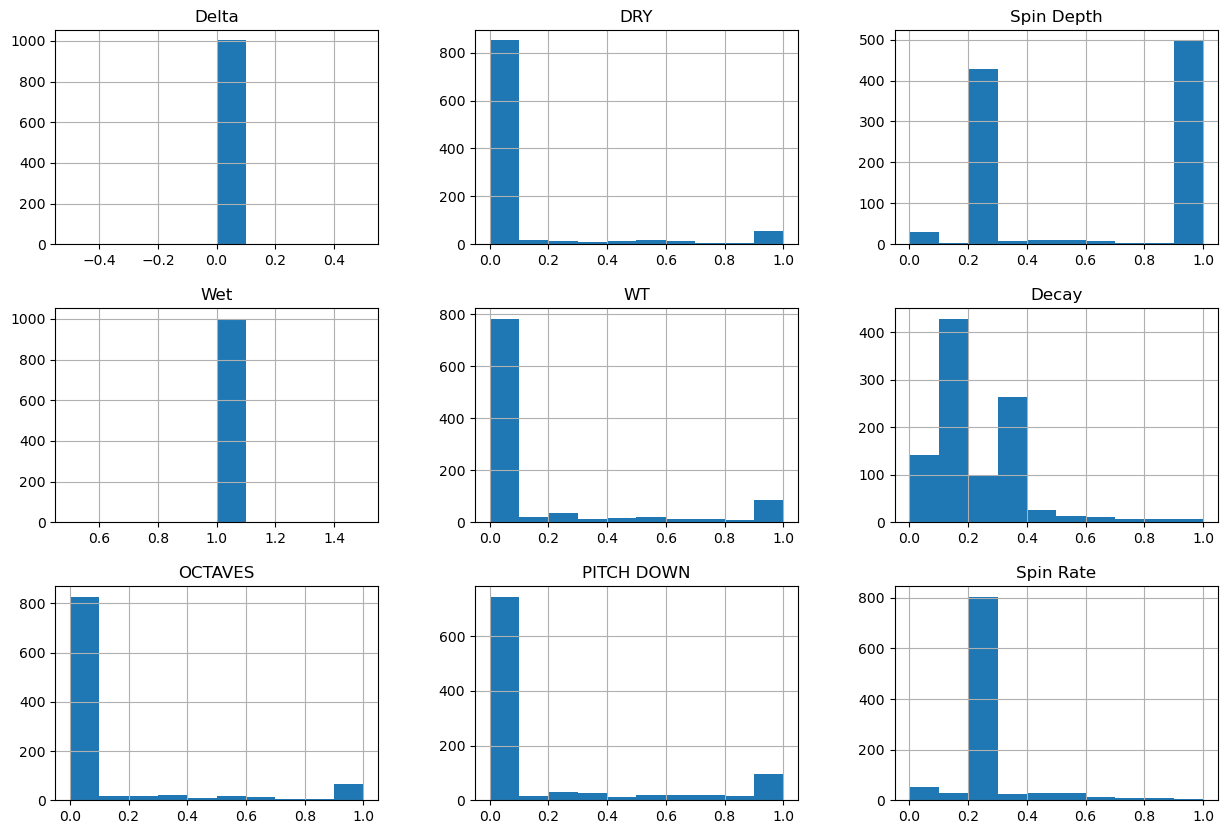

In [28]:
pre_processed_data[columns_to_check].hist(figsize=(15,10));

In [17]:
set1 = set(list(combined_data['Parameters']))
set2 = set(parameters)

difference = set2 - set1

difference_list = list(difference)

print(difference_list)

['VerbWdth', 'Phaser', 'VerbPDly', 'LP Filter', 'FX off', 'VerbDamp', 'Notch filter']


In [29]:
from difflib import get_close_matches

# Normalize case
normalized_columns = {col.lower(): col for col in combined_data.columns}
normalized_parameters = [param.lower() for param in parameters]

# Find exact matches
exact_matches = set(normalized_parameters).intersection(normalized_columns.keys())

In [31]:
# Retrieve the parameter descriptions
parameters_description = synth.get_parameters_description()

# Create a dictionary mapping parameter names (lowercase) to their indices
parameter_indices = {param['name'].lower(): param['index'] for param in parameters_description}

# Get the indices for the matching parameters
matching_indices = {param: parameter_indices[param] for param in exact_matches if param in parameter_indices}

# Convert the dictionary to a list of dictionaries for DataFrame creation
parameters_list = [{'parameter': param, 'index': idx} for param, idx in matching_indices.items()]

# Create DataFrame
parameters_df = pd.DataFrame(parameters_list).reset_index(drop=True)

parameters_df.head()

""


In [ ]:
# Load Serum
serum_path = "C:/Program Files/VSTPlugIns/Vinyl House Drums.vst3"
synth_plugin = load_plugin(serum_path)

# Print the plugin to verify it's loaded correctly
print(synth_plugin)